In [39]:
#Diagnosis using logistic regression: Wisconsin Breast Cancer Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline

In [40]:
data = load_breast_cancer()

In [41]:
list(data.feature_names)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [42]:
list(data.target_names)

['malignant', 'benign']

In [43]:
data.data.shape

(569, 30)

In [44]:
X = data.data
y = data.target

In [45]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [46]:
#create the splits (train and test/dev)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=42)

In [47]:
#normalise the data
scaler = MinMaxScaler()

In [48]:
scaler.fit(X_train)

MinMaxScaler()

In [49]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
#initialise the logistic regression model
model = LogisticRegression()

In [51]:
#train it using training set
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
#do the prediction on test
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)
p1 = y_pred_prob[:,0]
p2 = y_pred_prob[:,1]

In [53]:
df = pd.DataFrame({'True Class': y_test, 
                   'Predicted Class': y_pred, 
                   'Pr(Perk=0|X)': p1,
                   'Pr(Perk=1|X)': p2})
df

,True Class,Predicted Class,Pr(Perk=0|X),Pr(Perk=1|X)
0,1,1,0.178281,0.821719
1,0,0,0.967486,0.032514
2,0,0,0.836449,0.163551
3,1,1,0.058157,0.941843
4,1,1,0.019742,0.980258
5,0,0,0.999935,0.000065
6,0,0,0.999303,0.000697
7,0,0,0.703815,0.296185
8,1,1,0.484224,0.515776
9,1,1,0.040614,0.959386


In [54]:
#test performance of the model
print('Test Accuracy:',np.mean(y_test == y_pred))

Test Accuracy: 0.9824561403508771


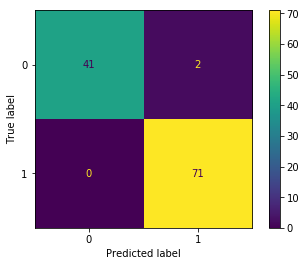

In [55]:
plot_confusion_matrix(model, X_test, y_test)